# Imports

In [53]:
%reload_ext autoreload
%matplotlib inline

In [54]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [55]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [56]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [57]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [58]:
toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [59]:
# toocan is a list. to access an object:
toocan[0]

< MCS_IntParameters object:
 . label: 1
 . qc_MCS: 11100
 . duration: 12.5
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.18
 . lonInit: 115.04
 . latInit: 20.71
 . Utime_End: 17014.42
 . lonEnd: 116.37
 . latEnd: 21.88
 . lonmin: 114.93
 . latmin: 20.71
 . lonmax: 116.37
 . latmax: 21.89
 . vavg: 4.2
 . dist: 189.2
 . olrmin: 188.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 32864.0
 . surfmaxkm2_132Wm2: 32592.0
 . surfmaxkm2_110Wm2: 32320.0
 . surfmaxkm2_90Wm2: 31520.0
 . surfcumkm2_172Wm2: 354480.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.6737
 . localtime_End: 17015.1774
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [60]:
# to access an attribute:
toocan[4].duration

12.5

# MCS attribute histogram

In [98]:
attribute = "duration"
nbins = 50

In [99]:
def attr_list(data, attr_name):
    # Extract the attribute values from the data
    attribute_values = [getattr(obj, attr_name) for obj in data]   
    return attribute_values

In [100]:
# print(attribute)
attribute_list = attr_list(toocan, attribute)

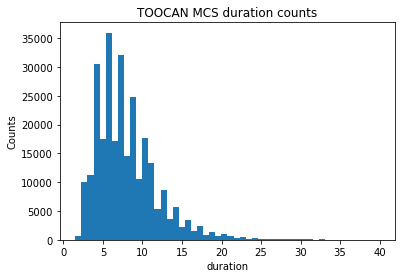

<Figure size 432x288 with 0 Axes>

In [101]:
hist, bin_edges, _ = plt.hist(attribute_list, bins=nbins)
plt.xlabel(attribute)
plt.ylabel("Counts")
plt.title(f"TOOCAN MCS {attribute} counts")
plt.show()
# plt.savefig(f'histograms/TOOCAN_{attribute}_hist.png')

# Variable mean for each binned timestep
* note: for plot of mean, the xlabel for each bar is of the upper bin edge

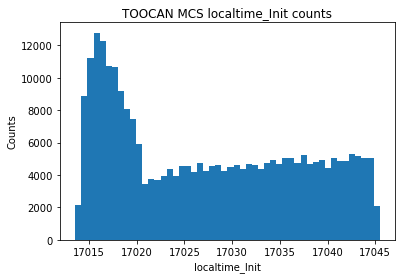

In [108]:
#-- binning times
localtime_Init_list = attr_list(toocan, "localtime_Init")
localtime_Init_hist, localtime_Init_bin_edges, localtime_Init__ = plt.hist(localtime_Init_list, bins=nbins)
plt.xlabel("localtime_Init")
plt.ylabel("Counts")
plt.title(f"TOOCAN MCS localtime_Init counts")
plt.show()

In [103]:
# Extract the values of the attribute and localtime_Init from the objects
attribute_values_list = [getattr(obj, attribute) for obj in toocan]
localtime_init_values = [getattr(obj, 'localtime_Init') for obj in toocan]

# Convert localtime_Init bin edges to a NumPy array
localtime_init_bin_edges = np.array(localtime_Init_bin_edges)

# Digitize the localtime_Init values to determine the bin indices for each object
bin_indices = np.digitize(localtime_init_values, localtime_init_bin_edges)

# Calculate the mean of the attribute for each time period bin
mean_values = [np.mean(np.array(attribute_values_list)[bin_indices == i]) for i in range(1, len(localtime_init_bin_edges))]

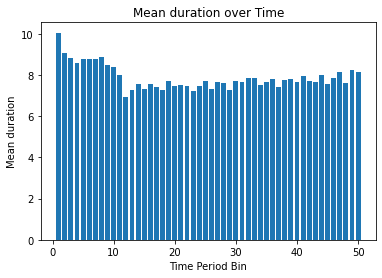

In [104]:
# Plot the mean values for each time period bin
plt.bar(range(1, len(localtime_init_bin_edges)), mean_values)
plt.xlabel('Time Period Bin')
plt.ylabel('Mean ' + attribute)
plt.title('Mean ' + attribute + ' over Time')
plt.show()

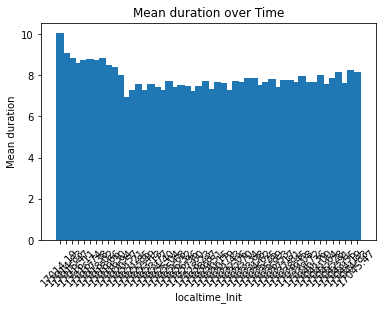

In [107]:
# Plot the mean values for each time period bin
plt.bar(localtime_init_bin_edges[1:], mean_values)
plt.xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Mean ' + attribute + ' over Time')

# Set the x-axis tick labels
plt.xticks(localtime_init_bin_edges[1:], rotation=45)

plt.show()